In [10]:
import csv
import math
import numpy as np
import matplotlib.pyplot as plt

def calculate_distance(point_1, point_2):
    """Return Euclidean distance between two points (x,y)."""
    return int(math.sqrt((point_1[0] - point_2[0])**2 + (point_1[1] - point_2[1])**2) + 0.5)


def calculate_whole_cost_and_distance(points, route,path=None):
    """Compute total distance + node costs for a given route."""
    whole_cost = 0
    for i in range(len(route) - 1):
        p1 = points[route[i]]
        p2 = points[route[i + 1]]
        whole_cost += calculate_distance(p1[:2], p2[:2]) + p2[2]
    # Close the loop
    p_last = points[route[-1]]
    p_first = points[route[0]]
    whole_cost += calculate_distance(p_last[:2], p_first[:2]) + p_first[2]
    return whole_cost


def Draw_routes(points_file, route_file=None, path=None):
    # --- Load points (x;y;size) ---
    points = []
    with open(points_file, newline='') as f:
        reader = csv.reader(f, delimiter=';')
        for row in reader:
            if len(row) >= 3:
                x, y, s = map(float, row)
                points.append((x, y, s))

    points = np.array(points)
    positions = points[:, :2]
    sizes = points[:, 2]

    # --- Normalize sizes ---
    min_s, max_s = sizes.min(), sizes.max()
    sizes_norm = 10 * (sizes - min_s) / (max_s - min_s) + 1 if max_s > min_s else np.ones_like(sizes)

    # --- Case 1: No route file → only plot points ---
    if route_file is None:
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.set_title('Raw nodes')
        ax.scatter(positions[:, 0], positions[:, 1], c='blue', s=sizes_norm * 4)
        ax.set_aspect('equal', adjustable='box')
        plt.tight_layout()
        plt.show()
        return

    # --- Case 2: Route file provided ---
    routes = []
    with open(route_file, newline='') as f:
        reader = csv.reader(f, delimiter=';')
        for row in reader:
            route = [int(i) for i in row if i.strip() != '']
            if route:
                routes.append(route)

    nplots = len(routes)
    fig, ax = plt.subplots(nplots, sharex=True, sharey=True, figsize=(6, 6 * nplots))
    if nplots == 1:
        ax = [ax]
    else:
        ax = ax.ravel()

    for idx, route in enumerate(routes):
        route = np.array(route, dtype=int)
        in_route = np.zeros(len(positions), dtype=bool)
        in_route[route] = True
        colors = np.where(in_route, 'blue', 'red')

        ax[idx].scatter(positions[:, 0], positions[:, 1], c=colors, s=sizes_norm * 2)
        ax[idx].set_aspect('equal', adjustable='box')

        for i in range(len(route) - 1):
            start_node = route[i]
            end_node = route[i + 1]
            start_pos = positions[start_node]
            end_pos = positions[end_node]
            ax[idx].annotate("",
                             xy=end_pos, xycoords='data',
                             xytext=start_pos, textcoords='data',
                             arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

        # Close the loop
        start_pos = positions[route[-1]]
        end_pos = positions[route[0]]
        ax[idx].annotate("",
                         xy=end_pos, xycoords='data',
                         xytext=start_pos, textcoords='data',
                         arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))

        # --- Calculate and display total cost ---
        total_cost = calculate_whole_cost_and_distance(points, route)
        ax[idx].text(
            0.98, 0.98, f"Total cost: {total_cost:.0f}",
            transform=ax[idx].transAxes,
            fontsize=10, fontweight='bold',
            color='darkgreen',
            ha='right', va='top',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.7)
        )
        if path is not None:
            plt.savefig(path+"_route.png")
    plt.tight_layout()
    plt.show()
    return total_cost


In [ ]:
"""plotting from assignment 1"""
# for i in  ['A', 'B']:
#     print(f'Drawing raw points for TSP{i}')
#     Draw_routes(f'./data/TSP{i}.csv')
#     for j in ['Random', 'NNE', 'NN', 'GC']:
#         print(f'Drawing best Hamiltonian cycle found with {j} for TSP{i}')
#         Draw_routes(f'./data/TSP{i}.csv', f'./assignment_1/results/{j}_best_{i}.csv')



In [ ]:
import matplotlib.pyplot as plt

"plotting for assignment 2 - i saved the needed plots to /visualizations"

best_results = {}
all_costs = {}  # <-- NEW

for i in ['A', 'B']:  # instances
    print(f'Drawing raw points for TSP{i}')
    Draw_routes(f'./data/TSP{i}.csv')
    
    for j in ['NN', 'GC']:  # algorithms
        best_result_letter_algorithm_cost = float('inf')
        best_result_letter_algorithm_id = None
        all_costs[f"instance_{i}_algorithm_{j}"] = {}  # init nested dict

        for h in ["HYBRID", "REGRET"]:  # heuristics
            if h == "HYBRID":
                for w in ["0.100000","0.200000","0.300000","0.400000","0.500000","0.600000","0.700000","0.800000","0.900000","1.000000"]:
                    label = f"{w}"
                    print(f'Drawing best Hamiltonian cycle found with {j} for TSP{i} with heuristic {h} and weight for cost {label}')
                    cost = Draw_routes(f'./data/TSP{i}.csv', f'./assignment_2/results/{j}_best_{h}_{i}_{label}_.csv')

                    # store cost
                    all_costs[f"instance_{i}_algorithm_{j}"][label] = cost

                    # check best
                    if cost < best_result_letter_algorithm_cost:
                        best_result_letter_algorithm_cost = cost
                        best_result_letter_algorithm_id = label

            else:  # REGRET
                label = "0"
                print(f'Drawing best Hamiltonian cycle found with {j} for TSP{i} with heuristic {h}')
                cost = Draw_routes(f'./data/TSP{i}.csv', f'./assignment_2/results/{j}_best_{h}_{i}_.csv')

                all_costs[f"instance_{i}_algorithm_{j}"][label] = cost

                if cost < best_result_letter_algorithm_cost:
                    best_result_letter_algorithm_cost = cost
                    best_result_letter_algorithm_id = label

        best_results[f"instance{i}_algorithm{j}"] = best_result_letter_algorithm_id

print("✅ Best results:")
print(best_results)

print("✅ All costs collected:")
print(all_costs)


In [ ]:
"""bar chart plotting -saved to visualization"""
import matplotlib.pyplot as plt
import os 
for key, values in all_costs.items():
    # Sort by key to keep weights in order
    sorted_values = {k: values[k] for k in sorted(values)}
    
    # Prepare labels and costs
    labels = [l if l == "0" else l[:3] for l in sorted_values.keys()]
    costs = list(sorted_values.values())
    
    # Create the plot
    plt.figure(figsize=(8, 4))
    plt.bar(labels, costs)
    
    # Find the minimum cost
    min_cost = min(costs)
    
    # Add a red horizontal line at the minimum value
    plt.axhline(y=min_cost, color='red', linestyle='--', linewidth=2,
                label=f"Minimum cost = {min_cost:.2f}")
    
    # Titles and labels
    plt.title(f"Hamiltonian Cycle costs for different weights in hybrid heuristic for {(' ').join(key.split('_'))}")
    plt.xlabel("Weight for the change of the objective")
    plt.ylabel("Cost")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    
    # Save the figure to a file
    save_dir = "./assignment_2/visualizations"
    filename = os.path.join(save_dir, f"{key}_hamiltonian_costs.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)  # dpi=300 gives higher quality
    
    plt.close()  # Close the figure to free memory




In [117]:
for key, values in all_costs.items():
    # Sort by key to keep weights in order
    sorted_values = {k: values[k] for k in sorted(values)}
    del sorted_values["0"]
    bottom_lim = np.min(np.array([val for val in sorted_values.values()]))
    top_lim = np.max(np.array([val for val in sorted_values.values()]))
    
    
    # Prepare labels and costs
    labels = [l if l == "0" else l[:3] for l in sorted_values.keys()]
    costs = list(sorted_values.values())
    
    # Create the plot
    plt.figure(figsize=(8, 4))
    plt.bar(labels, costs)
    plt.ylim(bottom_lim,top_lim)
    # Find the minimum cost
    min_cost = min(costs)
    
    # Add a red horizontal line at the minimum value
    #plt.axhline(y=min_cost, color='red', linestyle='--', linewidth=2,
               # label=f"Minimum cost = {min_cost:.2f}")
    
    # Titles and labels
    plt.title(f"Hamiltonian Cycle costs for different weights in hybrid heuristic for {(' ').join(key.split('_'))}")
    plt.xlabel("Weight for the change of the objective")
    plt.ylabel("Cost")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend()
    save_dir = "./assignment_2/visualizations"
    filename = os.path.join(save_dir, f"{key}_hamiltonian_costs_no_regret.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)  # dpi=300 gives higher quality
    plt.close()  # Close the figure to free memory


C:\Users\zenek\AppData\Local\Temp\ipykernel_1528\3208580433.py:29: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

"""plotting of the function of cost with respect to distance """
def plot_cost_evolution(points_file_path, route_file_paths, labels=None, spline=True):
    # Load points from path
    points = []
    with open(points_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if not line.strip():
                continue
            x, y, cost = map(float, line.strip().split(';'))  # adapt separator
            points.append((x, y, cost))
    points = np.array(points)

    # Generate labels from file names if not provided
    if labels is None:
        labels = [os.path.basename(p) for p in route_file_paths]

    plt.figure(figsize=(10, 6))

    for route_path, label in zip(route_file_paths, labels):
        # Load route
        route = []
        with open(route_path, 'r', encoding='utf-8') as f:
            for line in f:
                if not line.strip():
                    continue
                route.extend([int(i) for i in line.strip().split(';') if i.strip()])

        cost = [points[route[0]][-1]]  
        for k in range(1, len(route)):
            cost.append(calculate_whole_cost_and_distance(points,route[:k]))

        x_vals = np.arange(1, len(cost) + 1)

        final_cost = cost[-1]
        label_with_cost = f"{label} (final={final_cost:.2f})"

        if spline and len(cost) > 3:
            x_smooth = np.linspace(x_vals.min(), x_vals.max(), 500)
            spline_func = make_interp_spline(x_vals, cost, k=3)
            y_smooth = spline_func(x_smooth)
            plt.plot(x_smooth, y_smooth, label=label_with_cost)
        else:
            plt.plot(x_vals, cost, label=label_with_cost)

    plt.xlabel("Number of nodes visited")
    plt.ylabel("Cumulative cost")
    plt.title("Function of the cycle cost with respect to the path length" \
    " 1.Regret, 2.best weight hybrid 3.greedy")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()
    save_dir = "./assignment_2/visualizations"
    filename = os.path.join(save_dir, f"{instance}_{algorithm}_cost_change.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)  # dpi=300 gives higher quality
    plt.close()  # Close the figure to free memory
    plt.show()



In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

"""plotting of the function of cost with respect to distance """
def plot_cost_evolution(points_file_path, route_file_paths, labels=None, spline=True):
    # Load points from path
    points = []
    with open(points_file_path, 'r', encoding='utf-8') as f:
        for line in f:
            if not line.strip():
                continue
            x, y, cost = map(float, line.strip().split(';'))  # adapt separator
            points.append((x, y, cost))
    points = np.array(points)

    # Extract instance name from points_file_path
    instance = os.path.splitext(os.path.basename(points_file_path))[0]  # e.g., 'TSPA'

    # Extract algorithm from the first route file (assuming naming convention: ALG_best_...)
    first_route_name = os.path.basename(route_file_paths[0])
    algorithm = first_route_name.split('_')[0]  # e.g., 'NN'

    # Generate labels from file names if not provided
    if labels is None:
        labels = [os.path.basename(p) for p in route_file_paths]

    plt.figure(figsize=(10, 6))

    for route_path, label in zip(route_file_paths, labels):
        # Load route
        route = []
        with open(route_path, 'r', encoding='utf-8') as f:
            for line in f:
                if not line.strip():
                    continue
                route.extend([int(i) for i in line.strip().split(';') if i.strip()])

        cost = [points[route[0]][-1]]  
        for k in range(1, len(route)):
            cost.append(calculate_whole_cost_and_distance(points, route[:k]))

        x_vals = np.arange(1, len(cost) + 1)

        final_cost = cost[-1]
        label_to_write = label.split(".")[0]
        label_with_cost = f"{label_to_write} (final_cost={final_cost:.2f})"

        if spline and len(cost) > 3:
            x_smooth = np.linspace(x_vals.min(), x_vals.max(), 500)
            spline_func = make_interp_spline(x_vals, cost, k=3)
            y_smooth = spline_func(x_smooth)
            plt.plot(x_smooth, y_smooth, label=label_with_cost)
        else:
            plt.plot(x_vals, cost, label=label_with_cost)

    plt.xlabel("Number of nodes visited")
    plt.ylabel("Cumulative cost")
    plt.title("Function of the cycle cost with respect to the path length\n1.Regret, 2.best weight hybrid, 3.greedy")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.legend()

    # Ensure save directory exists
    save_dir = "./assignment_2/visualizations"
    os.makedirs(save_dir, exist_ok=True)

    # Save figure with instance and algorithm in filename
    filename = os.path.join(save_dir, f"{instance}-{algorithm}_cost_change.png")
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.close()


In [ ]:

"""plotting of the function of cost with respect to distance"""
plot_cost_evolution('./data/TSPA.csv', ['./assignment_2/results/NN_best_REGRET_A_.csv',
                                        './assignment_2/results/NN_best_HYBRID_A_0.400000_.csv',
                                        './assignment_2/results/NN_best_HYBRID_A_1.000000_.csv'])

plot_cost_evolution('./data/TSPA.csv', ['./assignment_2/results/GC_best_REGRET_A_.csv',
                                        './assignment_2/results/GC_best_HYBRID_A_0.300000_.csv',
                                        './assignment_2/results/GC_best_HYBRID_A_1.000000_.csv'])

plot_cost_evolution('./data/TSPB.csv', ['./assignment_2/results/NN_best_REGRET_B_.csv',
                                        './assignment_2/results/NN_best_HYBRID_B_0.900000_.csv',
                                        './assignment_2/results/NN_best_HYBRID_B_1.000000_.csv'])

plot_cost_evolution('./data/TSPB.csv', ['./assignment_2/results/GC_best_REGRET_B_.csv',
                                        './assignment_2/results/GC_best_HYBRID_B_0.500000_.csv',
                                        './assignment_2/results/GC_best_HYBRID_B_1.000000_.csv'])




Drawing raw points for TSPA


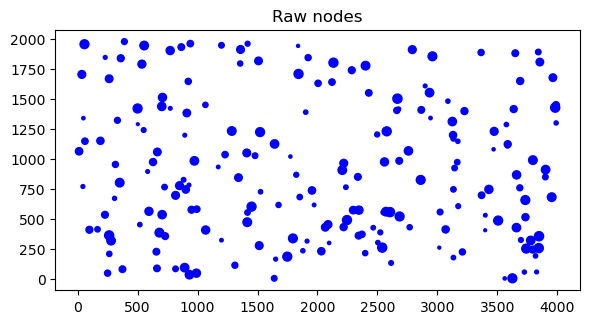

Drawing best Hamiltonian cycle found with false Node  for TSPA


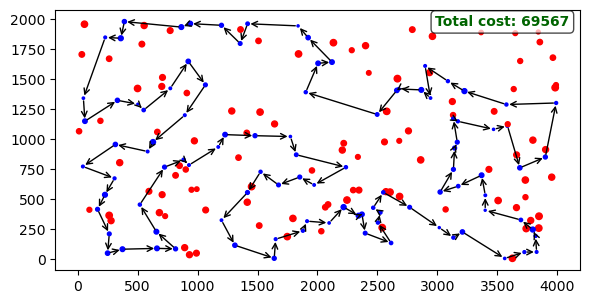

Drawing best Hamiltonian cycle found with false None  for TSPA


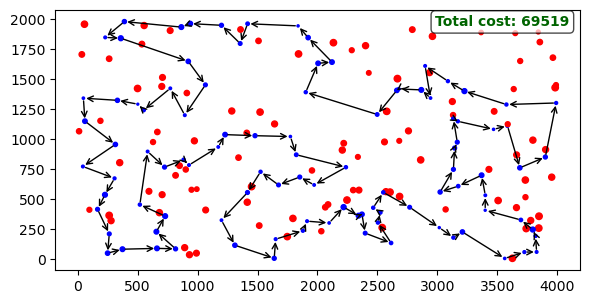

Drawing best Hamiltonian cycle found with false Mixed  for TSPA


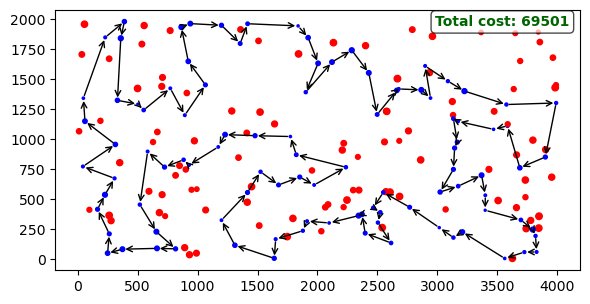

Drawing best Hamiltonian cycle found with true Node  for TSPA


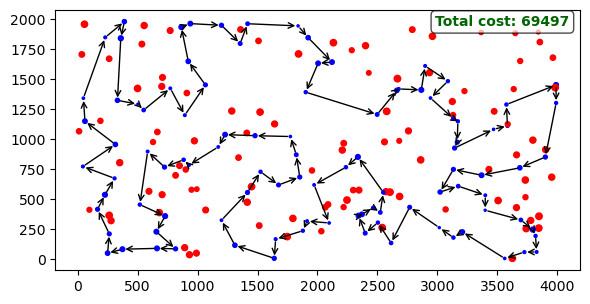

Drawing best Hamiltonian cycle found with true None  for TSPA


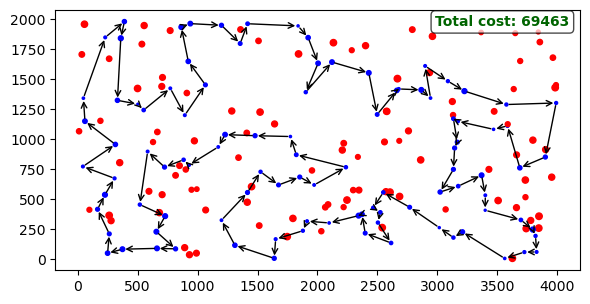

Drawing best Hamiltonian cycle found with true Mixed  for TSPA


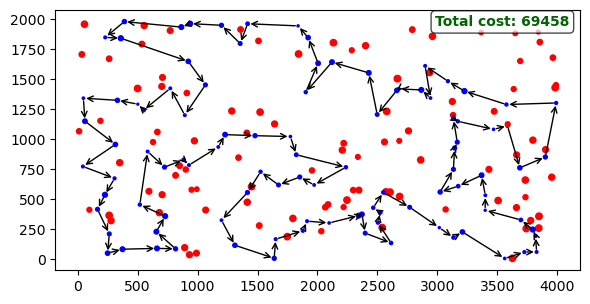

Drawing raw points for TSPB


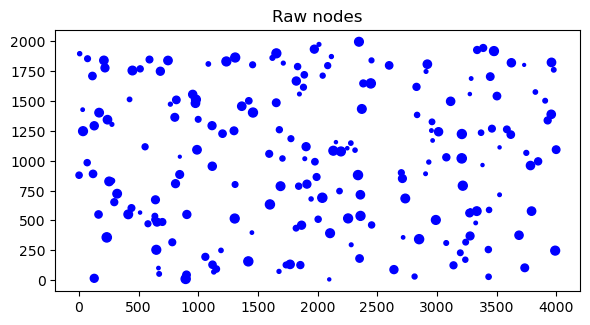

Drawing best Hamiltonian cycle found with false Node  for TSPB


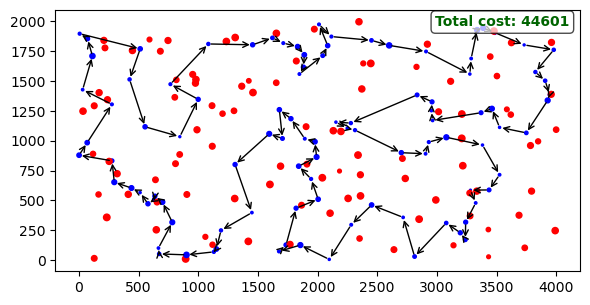

Drawing best Hamiltonian cycle found with false None  for TSPB


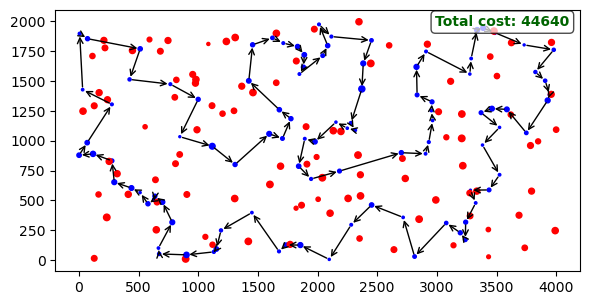

Drawing best Hamiltonian cycle found with false Mixed  for TSPB


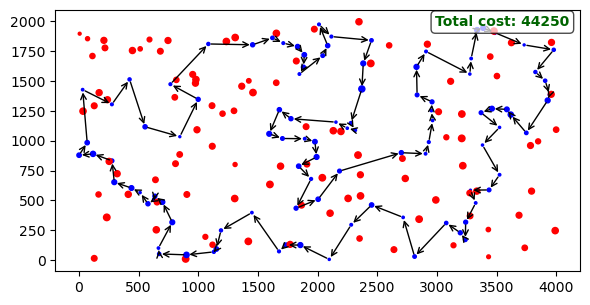

Drawing best Hamiltonian cycle found with true Node  for TSPB


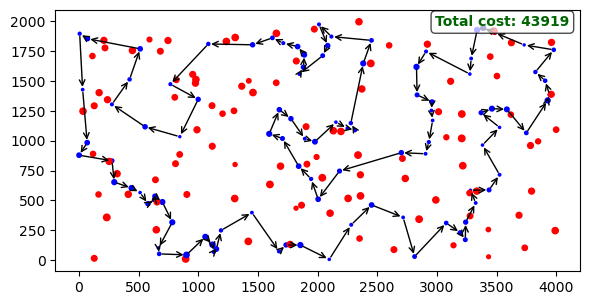

Drawing best Hamiltonian cycle found with true None  for TSPB


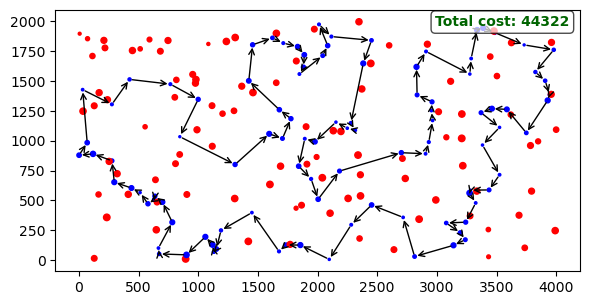

Drawing best Hamiltonian cycle found with true Mixed  for TSPB


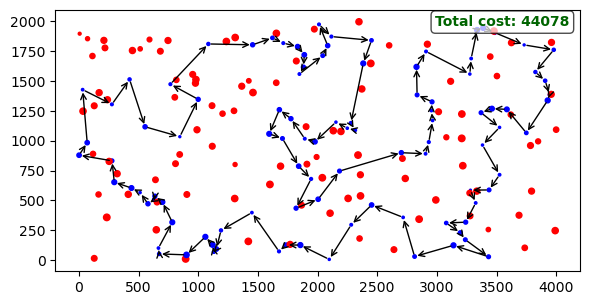

In [12]:
import matplotlib.pyplot as plt

"plotting for assignment 7"

best_results = {}
all_costs = {}  # <-- NEW

for i in ['A', 'B']:  # instances
    print(f'Drawing raw points for TSP{i}')
    Draw_routes(f'./data/TSP{i}.csv')
    
    for j in ['false', 'true']:  # with or without initial solution
        for h in ["Node", "None","Mixed"]:  # heuristi
            print(f'Drawing best Hamiltonian cycle found with {j} {h}  for TSP{i}')
            cost = Draw_routes(f'./data/TSP{i}.csv', f'./assignment_6/results/{i}Local_Search_{j}{h}_drs_best.csv',
                               path=f'./assignment_7/plots/TSP{i}_LS_{j}_{h}_best')


## plotting for assignment 6

Drawing raw points for TSPA


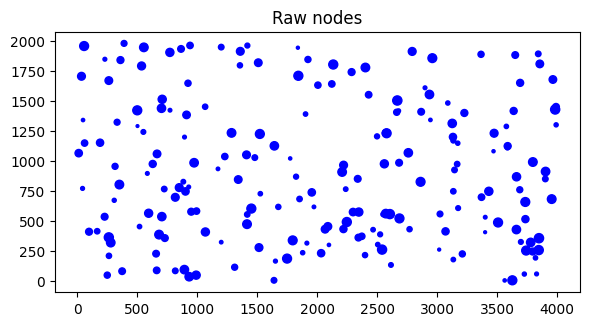

Drawing best Hamiltonian cycle found with ILS for TSPA


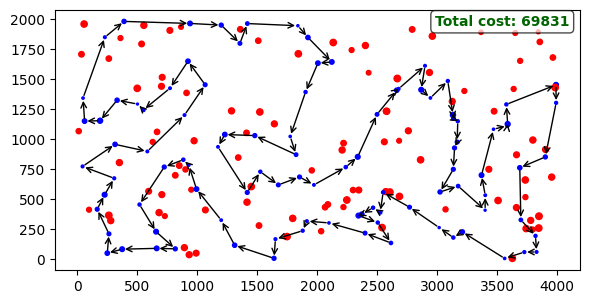

Drawing best Hamiltonian cycle found with MSLS for TSPA


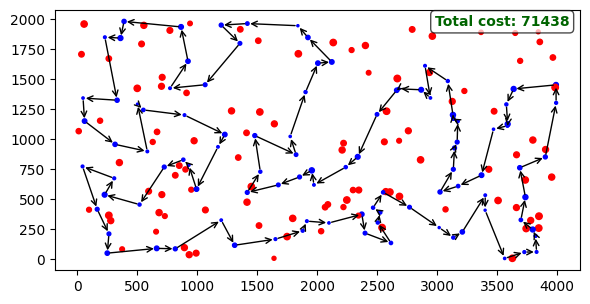

Drawing raw points for TSPB


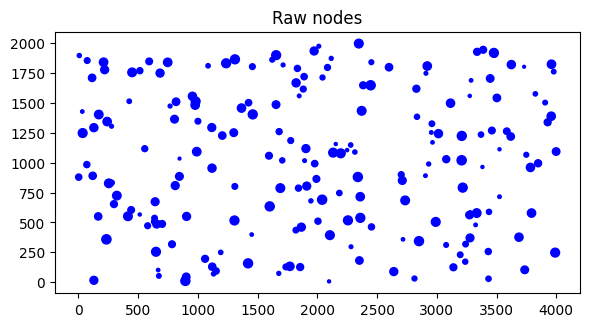

Drawing best Hamiltonian cycle found with ILS for TSPB


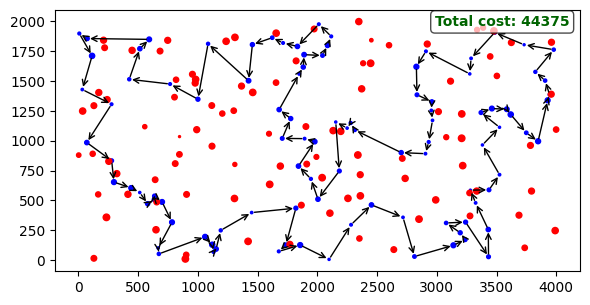

Drawing best Hamiltonian cycle found with MSLS for TSPB


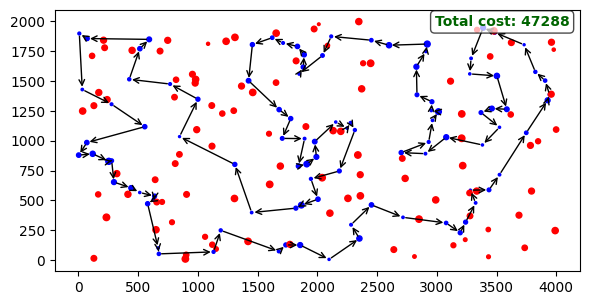

In [2]:
import matplotlib.pyplot as plt

"plotting for assignment 6"

best_results = {}
all_costs = {}  # <-- NEW

for i in ['A', 'B']:  # instances
    print(f'Drawing raw points for TSP{i}')
    Draw_routes(f'./data/TSP{i}.csv')
    
    for j in ['ILS', 'MSLS']:
        print(f'Drawing best Hamiltonian cycle found with {j} for TSP{i}')
        cost = Draw_routes(f'./data/TSP{i}.csv', f'./assignment_6/results/{i}_{j}_best.csv')


## conclusions
